# Python for scientific computing

###Introduction
Python is powerful programming language for scientific, but for many people switching from C/C++ or MATLAB, getting started can be a little tricky, as Python has some key differences. The goal of this notebook is to walk the user through a fairly standard data analysis work-flow that one might encounter when working with neuroimaging data. On the way we will see how to find the right tools for the job, perform basic array manipulations, and even do a little machine learning.

###Packages
Python is, first and foremost, a general-purpose programming language. This allows programmers to write very modular and robust code that is easy to share. It also means that, unlike a scientific computing environment like MATLAB, many of the standard data analysis data-types (e.g. arrays, tables, etc) and tools for working with them are not built-in. Instead, these tools have been written by groups of experts and are made available to Python *packages*. One of the key aspects of using Python is finding the right tools (i.e. packages) for the job.

The Python scientific computing community has produced and number of great packages:
- NumPy: multi-dimnesional arrays (http://www.numpy.org/)
- SciPy: general scientific computing -- linear algebra, optimization, special function, and more (http://docs.scipy.org/doc/scipy/reference/)
- Pandas: tabular data manipulation (http://pandas.pydata.org/)
- Matplotlib and PyPlot: plotting (http://matplotlib.org/)
- SymPy: symbolic mathematics (http://www.sympy.org/en/index.html)

Finally, a word about IPython. IPython is not a package, but an interactive Python environment that comes with many of these packages built in. IPython makes it playing around with Python much more pleasant and supports notebooks such as this one!

Let's start "importing" two packages: NumPy for array manipulation and PyPlot for plotting:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib inline

* Line 1: Since a packages name can be quite long, we can give them shorter names when we import them. We do this on the fist line by importing NumPy as `np`. NumPy will let us manipulate arrays.


* Line 2: Packages can also contain subpackages (or *modules*). On the second line, we import PyPlot from within the larger package Matplotlib. PyPlot gives us plotting with a syntax very similar to MATLAB.


* Line 3: Each of these packages has many functions inside of it that we can use. However, we might only want a single function from a packages. On the thrid line, we import only the `loadmat` function from SciPy's IO module. This function will let us import data from a MATLAB file.

The last line is actually not a Python command -- the `%` signifies a special command for the IPython that we are working in. This particular commands tells Matplotlib to plot its figures in the notebook, rather than it's usual behavior of plotting them in a separate window.

###Loading data
Now let's load some data. Since we imported the `loadmat` function, we can simply use it here.

In [2]:
loaded = loadmat('data.mat')

To see what is inside of our new `data` variable, we can simply type its name

In [3]:
loaded

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Nov 20 18:13:21 2015',
 '__version__': '1.0',
 'data': array([[[[26, 26, 26, ..., 26, 26, 26],
          [25, 25, 25, ..., 25, 25, 25]],
 
         [[26, 26, 26, ..., 26, 26, 25],
          [25, 25, 25, ..., 25, 25, 25]],
 
         [[26, 25, 26, ..., 25, 26, 25],
          [25, 25, 25, ..., 25, 25, 25]],
 
         ..., 
         [[26, 26, 26, ..., 26, 26, 26],
          [26, 26, 26, ..., 26, 26, 26]],
 
         [[26, 26, 26, ..., 26, 26, 26],
          [26, 26, 26, ..., 26, 26, 26]],
 
         [[26, 26, 26, ..., 26, 26, 26],
          [26, 26, 26, ..., 26, 26, 26]]],
 
 
        [[[26, 26, 26, ..., 26, 26, 26],
          [25, 25, 25, ..., 25, 25, 25]],
 
         [[26, 26, 26, ..., 26, 26, 26],
          [25, 25, 25, ..., 25, 25, 25]],
 
         [[26, 26, 26, ..., 26, 26, 26],
          [25, 25, 25, ..., 25, 25, 25]],
 
         ..., 
         [[26, 26, 26, ..., 26, 26, 26],
          [26, 26,

The `{}`s mean that this is a *dictionary* -- a Python data type that contains a collection of name/data (aka key/value) pairs. We see a few pieces of metadata as well as an array that contains our actual data. To get an element out of a collection we *index* into it with `[]`s. For a dictionary, we simply put the name we are interested in insdie of the brackets.

In [4]:
data = loaded['data']

If we want to see what *kind* of object we have, but we don't want to clutter our screen with the contents of the object, we can use the Python `type` function

In [5]:
type(data)

numpy.ndarray

###Manipulating and plotting with arrays
Our data is a NumPy `ndarray` (n-dimensional array) object. This is the core NumPy object for storing data that has an array format. In Python, objects can can *attributes* -- little pieces of data or functions that can manipulate the object. An `ndarray` has a `shape` attribute that tells us the dimensions of the array.

In [6]:
data.shape

(76, 87, 2, 20)

In this dataset, the first three dimensions are 3D space (x, y, and z) and the final dimension is time (t). The values are intensities measured from a fluorescence microsciopy experiment examing neural activity in an awake and behaving larval zebrafish brain.

A simple thing we might want to do is look how the signal at a single point in space changes over time. Let's use indexing to get this time series:

In [7]:
series = data[35, 35, 0, :]
series.shape

(20,)

Here we show how to get only the data a x = 35, y = 35, and z = 0. The `:` in the t index indicates that we want all time values. Note that Python is *zero-indexed* -- the first element is labeled by the index 0, as opposed to 1.

Next, let's plot now the value at this position changes over time using PyPlot's `plot` function.

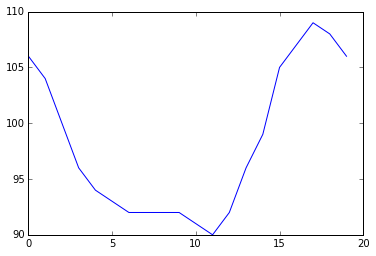

In [8]:
plt.plot(series);

Note: we use a semicolon at the end of this line to stop Python from displaying the contents of the `figure` object that `plt.plot` returns. 

Bonus material: While the plot above is fine, it is not the most aesthetically pleasing visualization ever. There is a wonderful Python package called Seaborn (http://stanford.edu/~mwaskom/software/seaborn/) that sets some nice default plotting parameters for PyPlot.

In [71]:
import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")

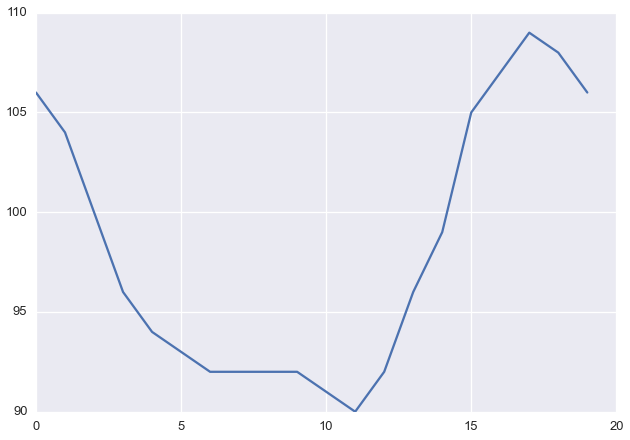

In [72]:
plt.plot(series);
sns.set_style('white');

Next, average value over time for each spatial location. For our array, this means taking the average over the last index (index = 3). Fortunately, NumPy has a function for this!

In [11]:
# compute the mean signal
avg = np.mean(data, axis=3)
avg.shape

(76, 87, 2)

Here we also introduce a comment on the first line. The `#` at the beginning of the line means that Python will ignore it; it's just there to help us remember what this code does.

We would like to visualize this spatial map of the mean signal, but our data is 3D, which can be copmlicated to visualize. Let's simplify to just the x and y dimensions. One way to collapse the z-dimension is to take maximum value across z for each x,y coordinate. NumPy has a function for this too!

In [12]:
# take a max-projection through z
proj = np.amax(avg, axis=2)
proj.shape

(76, 87)

Now we can make a figure showing the structure of this 2x2 array. This is done through PyPlot's `matshow` function.

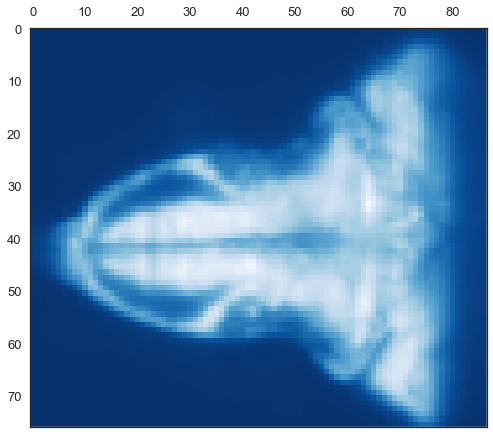

In [73]:
# plot the image
plt.figure(figsize=(15,8));
plt.matshow(proj, cmap='Blues_r', interpolation='none');

Here we see a new feature of functions in Python: optional *keyword arguments*. The `matshow` function requires a 2D matrix to show. If only give this, it will use its default settings to pick things like the color-scheme and image smoothing. Here however, we use the keyword arguments `cmap` and `interpolation` to pick the colormap and the smoothing scheme explicitly.

###Fitting a machine learning model
The SciKit-Learn package, `sklearn` (http://scikit-learn.org/stable/), contains algorithms for fitting a large range to machine learning algorithms -- everything from linear regression to coplicated dimensionality reduction techniques.

As a side-note, the SciKits are an expasive set of Python packages that have specialized functions across a range of disciplines such as image processing, bioinformatics, etc.

We will fit a KMeans clustering model, so we start by importing the KMeans object from SciKit-Learn.

In [20]:
from sklearn.cluster import KMeans

This KMeas object lets us set the parameters on the algorithm that will be used to fit the model. We will use all of the default values except for specifying the number of clusters that we want.

In [76]:
algorithm = KMeans(n_clusters=6)

This algorithm takes a 2D array. The first demension is different data points; the second dimension represents *features* associated with each data point. The algorithm will try to cluster the data points into groups that have common feature values. We want to use each point in space as a data point and use the signal at each point in time as the features. This will find clusters of points in space that have similar time series.

To do this we need to reshape our data array into something that is space-by-time

In [26]:
shape = data.shape
shape

(76, 87, 2, 20)

To find the number of spatial points that we have, we mulitply the first three of these timensions -- we can get these by indexing with `[:3]` which indicates "get the first 3 elements". Then we use NumPy's `product` function to multiply them together. Finally we take this and the size of the time dimension and put them together into the new dimensions (this is the trickiest this we will do in this tutorial!)

In [30]:
new_shape = (np.product(shape[:3]), shape[3])
new_shape

(13224, 20)

Now we reshape the array to our new size.

In [77]:
reshaped = np.reshape(data, new_shape)
reshaped.shape

(13224, 20)

Finally we can fit the model

In [79]:
model = algorithm.fit(reshaped)

A fitted KMeans model consists of the centers of each cluster. To figure out which cluster a particular data point belongs to, the model just checks to see which cluster center it is the closest to. This is done through the model's `predict` function, to which we give the original data that we trained the model on.

In [82]:
labels = model.predict(reshaped)
labels.shape

(13224,)

This gives us the label for each point in space. Now we want to put these back into their original 3D form.

In [84]:
labels = np.reshape(labels, shape[:3])
labels.shape

(76, 87, 2)

We can now visualize which cluster each point in space belongs to. We use a *for loop* and PyPlot's `subplot` function to not have rewrite any code to plot both z-planes.

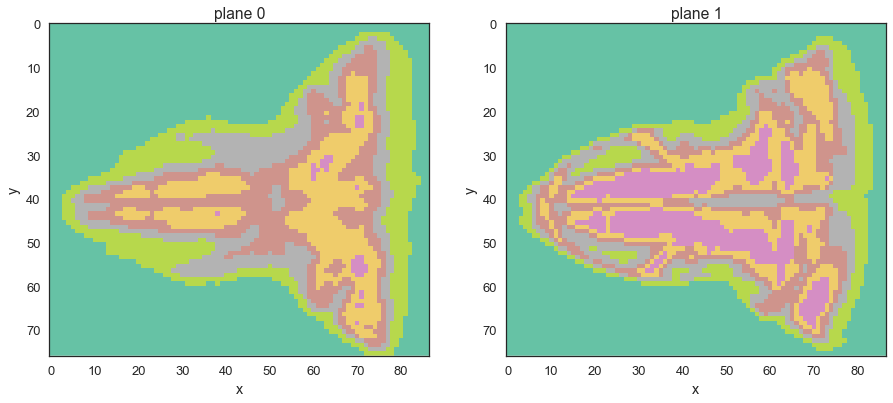

In [75]:
plt.figure(figsize=(15,7))
for i in xrange(2):
    plt.subplot(1,2,i+1)
    plt.imshow(labels[:,:,i], cmap='Set2', interpolation='none')
    plt.title('plane ' + str(i))
    plt.xlabel('x')
    plt.ylabel('y')

###Further learning
We didn't cover the details of a lot of what was going on that last bit of code. However, the internet contains lots of resources for digging into Python programming and all of the packages that we have used have excellent documentation to help you understand what certain functions do.

Code Academy has a great interactive course for learning the basics of Python programming (https://www.codecademy.com/learn/python)

Python also has compiled an excellent list of learning resources (https://wiki.python.org/moin/BeginnersGuide)

Finally, the Python documentation is also quite good and worth a look (https://docs.python.org/2/)